# 질문 키워드

In [1]:
user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

In [6]:
import requests
from bs4 import BeautifulSoup
import time
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Hannanum

In [4]:
questions = []

for i in range(1, 6):
    res = requests.get("https://qna.programmers.co.kr/?page={}".format(i), user_agent)
    soup = BeautifulSoup(res.text, "html.parser")
    parsed_datas = soup.find_all("li", "question-list-item")

    for data in parsed_datas:
        questions.append(data.h4.text.strip())

    time.sleep(0.5)

In [5]:
questions[: 10]

['고1 프로그래밍',
 'text에니메이션 효과를 영상처럼 표현하고 싶어요!!!',
 '[플러터] 다른 사람의 작업물 실행하니 빈화면이 뜹니다.',
 '백엔드 개발자로 1년간 취준했던 신입입니다. IT 쪽 개발 전망에 대해 몇가지 궁금한 점이 있습니다.',
 '욜로와 텐서플로우',
 '파이썬 확장파일을 만든후 열려고 하면 순식간에 열린듯 하다가 사라져버립니다.',
 'certbot으로 받은 인증서로 ssl 접속이 안됩니다',
 '파이썬 초보입니다. 5×5로 입력을 받아서 가장 긴 막대기의 길이를 출력하는 코드',
 '링버퍼 내 & 연산자를 모르겠습니다.',
 'next js 와 express 연동 질문']

In [9]:
words = []

hannanum = Hannanum()

for question in questions:
    nouns = hannanum.nouns(question)
    words += nouns

In [10]:
words[: 10]

['고1', '프로그래밍', '에니메이션', '효과', '영상', '표현', '[플러터]', '사람', '작업물', '실행']

In [11]:
counter = Counter(words)

counter

Counter({'질문': 49,
         '파이썬': 29,
         '오류': 21,
         '문제': 21,
         '언어': 20,
         '코드': 18,
         '수': 18,
         '방법': 14,
         '관련': 14,
         '코딩': 10,
         '출력': 9,
         '코딩테스트': 9,
         '질문드': 8,
         '자바': 7,
         '발생': 7,
         '값': 7,
         '중': 7,
         '실행': 6,
         '궁금': 6,
         '데': 6,
         '사용': 6,
         '에러': 6,
         '프로그래머스': 6,
         '때': 6,
         '프로그램': 6,
         '식': 6,
         '입력': 5,
         '문': 5,
         '부분': 5,
         '설정': 5,
         '구현': 5,
         '웹': 5,
         '해결': 5,
         '것': 5,
         '합': 5,
         '프로그래밍': 4,
         '클래스': 4,
         '파': 4,
         '작성': 4,
         '데이터': 4,
         '시간': 4,
         '저': 4,
         '모듈': 4,
         '기초': 4,
         '테스트': 4,
         '이용': 4,
         '분': 4,
         '공부': 4,
         '파일': 4,
         '개발': 3,
         '초보': 3,
         '내': 3,
         '연산자': 3,
         '연동': 3,
         '크롤링'

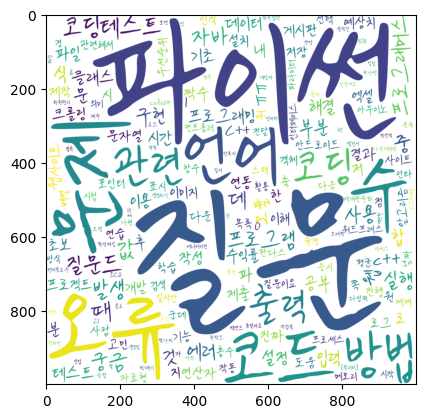

In [12]:
wordcloud = WordCloud(font_path="/Users/Song/fonts/tree.ttf", background_color="white", width=1000, height=1000)

img = wordcloud.generate_from_frequencies(counter)
plt.imshow(img)